In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [6]:
credit_card_data = pd.read_csv('creditcard.csv')


In [7]:
credit_card_data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [8]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
5969,6634,-1.611463,0.190648,0.901715,1.531254,-1.535865,0.799245,1.513786,0.495829,0.200390,...,0.211223,0.007477,1.026272,0.057628,-0.024955,-0.368263,0.081684,0.140669,458.92,0.0
5970,6635,-1.420272,1.449354,1.320110,-1.894320,0.913695,0.454601,0.894179,-0.385450,2.433841,...,-0.529027,-0.368394,-0.247773,-1.189156,-0.126040,0.701487,0.277333,-0.222694,0.77,0.0
5971,6637,-1.206696,0.284728,2.152053,-2.850437,-0.437285,-0.238376,-0.333341,0.334679,2.870542,...,0.039460,0.464476,-0.457193,-0.556105,0.517579,0.008006,0.366054,0.185008,14.00,0.0
5972,6644,1.067611,0.091006,-0.153917,0.704233,0.113894,-0.826866,0.567690,-0.464181,0.957295,...,-0.476723,-1.410090,-0.037550,-0.177773,0.321810,0.114930,-0.109640,0.023205,139.90,0.0
5973,6645,-0.535272,-0.132299,2.180041,1.018303,-1.498819,0.529570,0.420147,0.045445,1.543919,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5974 entries, 0 to 5973
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5974 non-null   int64  
 1   V1      5974 non-null   float64
 2   V2      5974 non-null   float64
 3   V3      5974 non-null   float64
 4   V4      5974 non-null   float64
 5   V5      5974 non-null   float64
 6   V6      5974 non-null   float64
 7   V7      5974 non-null   float64
 8   V8      5974 non-null   float64
 9   V9      5974 non-null   float64
 10  V10     5974 non-null   float64
 11  V11     5974 non-null   float64
 12  V12     5974 non-null   float64
 13  V13     5974 non-null   float64
 14  V14     5974 non-null   float64
 15  V15     5974 non-null   float64
 16  V16     5974 non-null   float64
 17  V17     5974 non-null   float64
 18  V18     5973 non-null   float64
 19  V19     5973 non-null   float64
 20  V20     5973 non-null   float64
 21  V21     5973 non-null   float64
 22  

In [10]:
#check the number of missing values(null) in each column, in this case 0
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [11]:
#check the distribution of legit and fraudulent transaction
credit_card_data['Class'].value_counts()

0.0    5970
1.0       3
Name: Class, dtype: int64

In [12]:
#Seperate the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]


In [13]:
#shape of the dataframes
#rows and colums
print(legit.shape)
print(fraud.shape)

(5970, 31)
(3, 31)


In [14]:
#statistical measures of the data in this case we're looking at the Amount metric only
#mean mode percentile etc
legit.Amount.describe()

count    5970.000000
mean       64.965707
std       192.429839
min         0.000000
25%         4.450000
50%        15.620000
75%        56.485000
max      7712.430000
Name: Amount, dtype: float64

In [15]:
fraud.Amount.describe()

count      3.000000
mean     256.310000
std      264.880121
min        0.000000
25%      119.965000
50%      239.930000
75%      384.465000
max      529.000000
Name: Amount, dtype: float64

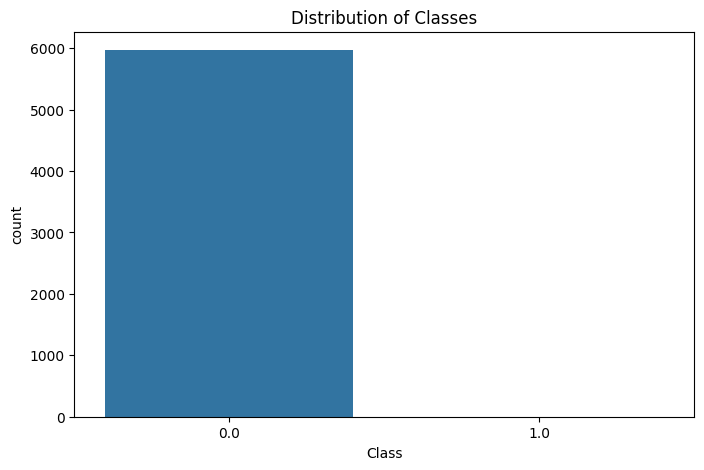

In [16]:
# Plot histogram of the 'Class' column
plt.figure(figsize=(8, 5))
sns.countplot(x='Class', data=credit_card_data)
plt.title('Distribution of Classes')
plt.show()

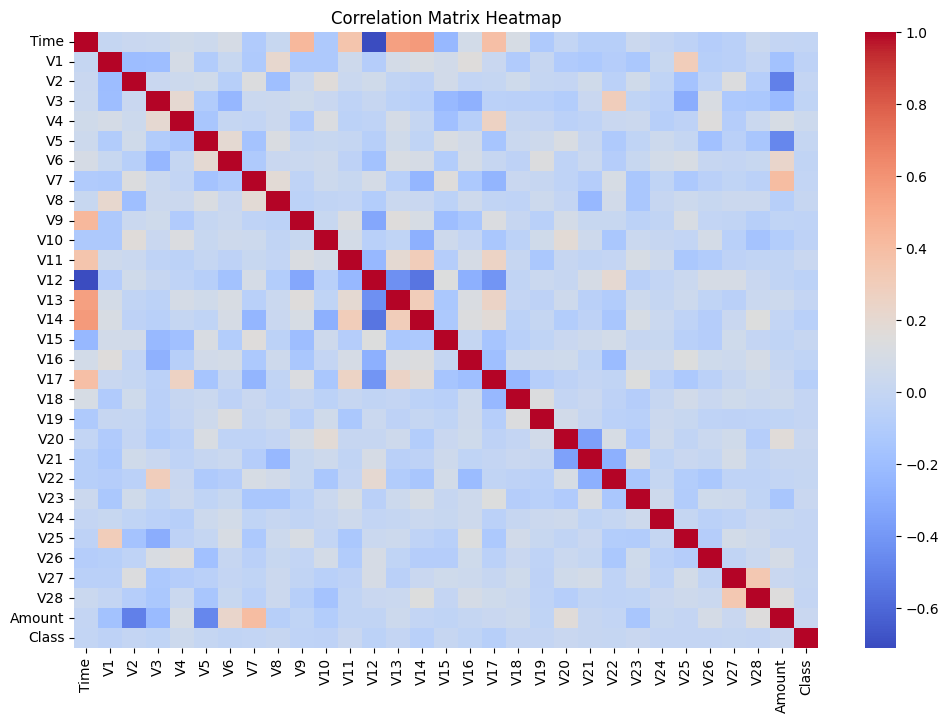

In [42]:
# Plot correlation matrix heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = credit_card_data.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

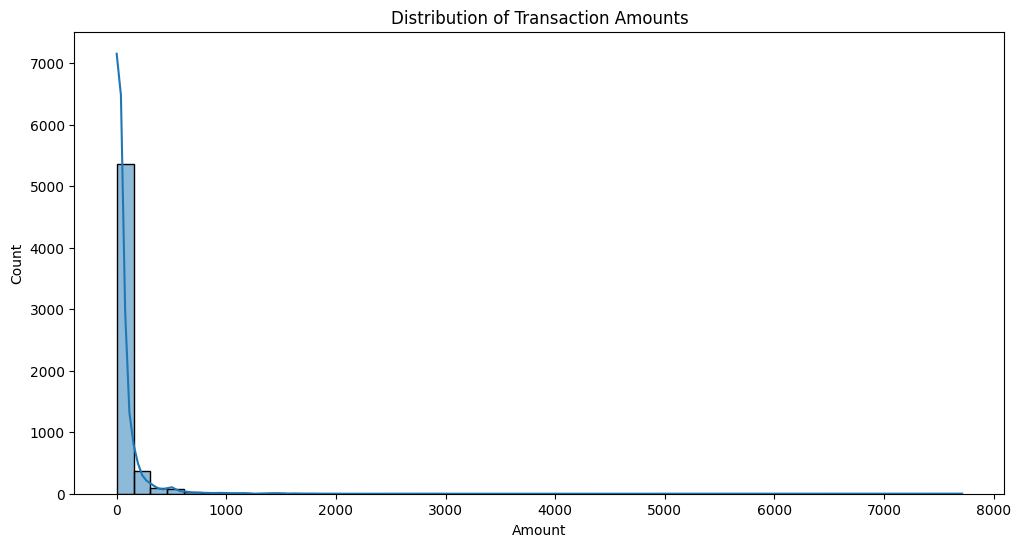

In [18]:
# Plot distribution of the 'Amount' feature
plt.figure(figsize=(12, 6))
sns.histplot(credit_card_data['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.show()

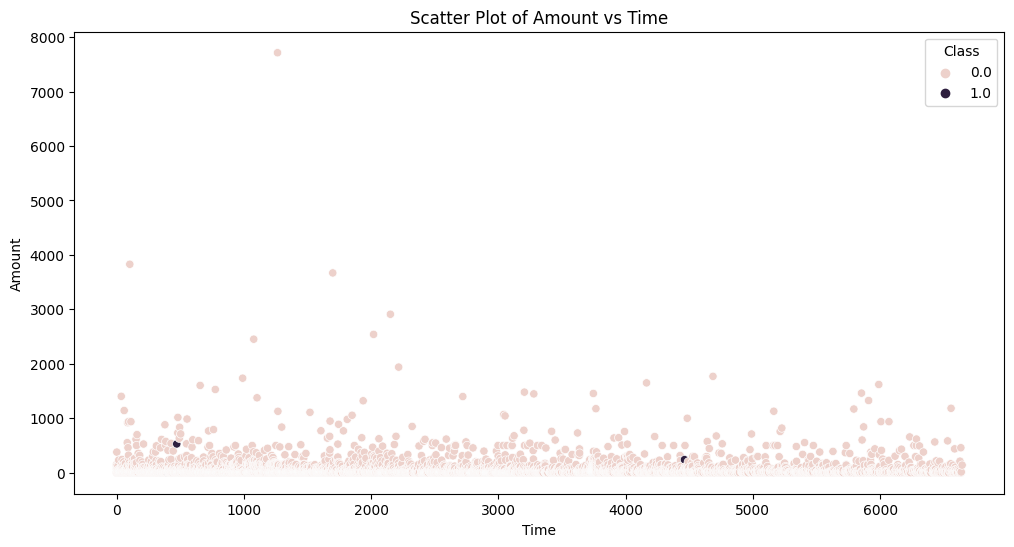

In [43]:
# Plot scatter plot of Amount vs Time
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Time', y='Amount', data=credit_card_data, hue='Class', )
plt.title('Scatter Plot of Amount vs Time')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

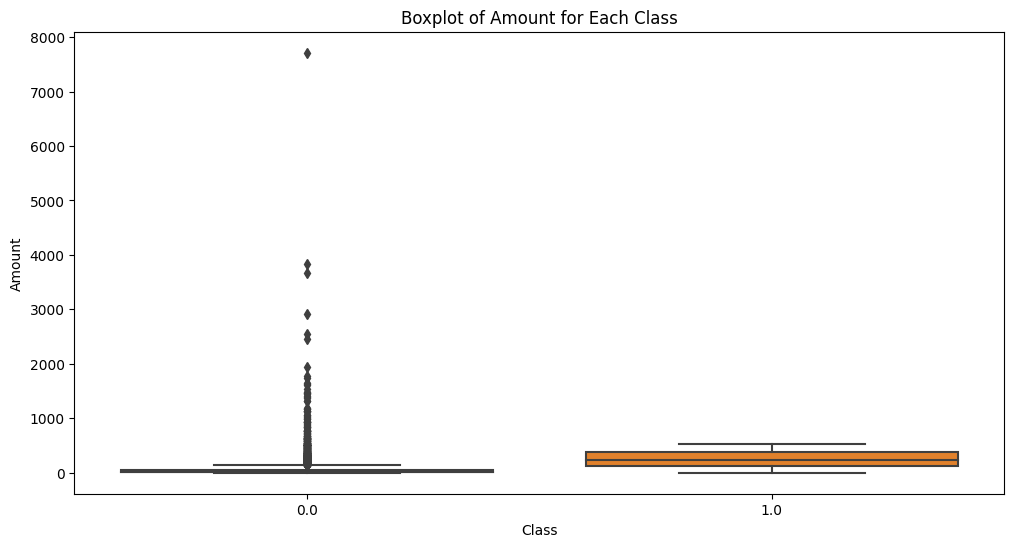

In [20]:
# Plot boxplot of Amount for each Class
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='Amount', data=credit_card_data)
plt.title('Boxplot of Amount for Each Class')
plt.show()

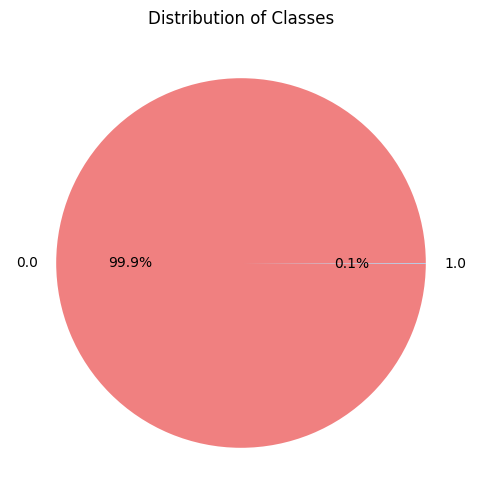

In [21]:
# Count the number of occurrences of each class
class_counts = credit_card_data['Class'].value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Distribution of Classes')
plt.show()

In [22]:
#Compare the statistical measures of the two classes
#you can try mode
credit_card_data.groupby('Class').mean()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,2677.40201,-0.264965,0.285625,0.844580,0.102656,0.000958,0.195420,0.018542,-0.039195,0.397472,...,0.055426,-0.043268,-0.161540,-0.036683,0.028985,0.089890,-0.040132,0.025238,0.006163,64.965707
1.0,1780.00000,-2.553039,0.184644,-0.293711,2.872264,0.005330,-0.855718,-0.549831,0.308239,-1.093098,...,0.599742,0.294921,-0.177321,0.361160,-0.020311,0.056068,-0.170050,0.015979,-0.086847,256.310000


In [23]:
#randomly sample the legit dataframe
legit_sample = legit.sample(n=492)


In [24]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)
#axis 0, data added rowise, axis is 1, data is added columnwise

In [25]:
new_dataset.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1962,1509,-0.275483,0.997098,1.332367,-0.164833,0.402264,-0.417759,0.848350,-0.144494,-0.536246,...,-0.278296,-0.585854,-0.096721,-0.045387,-0.159268,0.045378,0.077773,-0.137186,9.99,0.0
3914,3498,1.207007,0.766069,0.371305,2.485754,0.145122,-0.695398,0.481452,-0.285804,-1.097817,...,-0.032548,-0.068389,-0.068950,0.406051,0.647004,0.002557,-0.020448,0.018763,6.82,0.0
4657,4048,-1.619060,0.687492,2.283881,0.135850,-0.348660,2.173278,-0.637450,1.274966,1.318315,...,-0.018311,0.387256,0.109870,-0.870232,-0.150190,0.425930,0.113039,0.013690,60.90,0.0
2396,1958,-0.955428,-0.916252,1.081932,-3.043443,1.176495,3.774850,-0.828294,1.103081,-1.006860,...,-0.092564,-0.286023,0.068751,1.039401,0.107524,1.422344,-0.061160,0.069320,120.00,0.0
4481,3783,1.106262,0.398131,1.815655,2.990708,-0.865004,0.009125,-0.626067,0.048107,1.336733,...,-0.212720,-0.199560,0.094663,0.646047,0.238918,-0.102657,0.018308,0.033028,0.00,0.0


In [26]:
new_dataset.tail()
#you will see fraud as it was added rowise

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
4648,4031,0.616530,-0.646103,0.058235,1.693471,-0.412487,-0.087944,0.255162,0.012491,1.366687,...,0.045927,-0.186950,-0.305336,0.144733,0.511282,-0.321653,-0.070491,0.038415,274.96,0.0
4186,3750,1.385821,-0.709497,-0.924113,-1.609805,1.450344,3.277640,-1.159713,0.708269,0.359162,...,-0.273240,-0.902501,0.074160,0.920434,0.354078,-0.509239,-0.021449,0.016840,50.00,0.0
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0
4920,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1.0


In [27]:
#confirrms undersampling worked
new_dataset['Class'].value_counts()


0.0    492
1.0      3
Name: Class, dtype: int64

In [28]:
#Compare the statistical measures of the two classes
new_dataset.groupby('Class').mean()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,2761.351626,-0.248425,0.362165,0.811813,0.166608,0.046473,0.133592,0.060655,-0.027914,0.349764,...,0.074642,-0.091233,-0.159323,-0.047926,0.041795,0.078212,-0.027589,0.012061,0.002029,60.489045
1.0,1780.000000,-2.553039,0.184644,-0.293711,2.872264,0.005330,-0.855718,-0.549831,0.308239,-1.093098,...,0.599742,0.294921,-0.177321,0.361160,-0.020311,0.056068,-0.170050,0.015979,-0.086847,256.310000


In [29]:
X = new_dataset.drop(columns = 'Class', axis = 1) #axis is equal toone hence the split will happen columnwise
Y = new_dataset['Class']

In [30]:
print(X)
#notice the number of columns has reduced by 1


      Time        V1        V2        V3        V4        V5        V6  \
1962  1509 -0.275483  0.997098  1.332367 -0.164833  0.402264 -0.417759   
3914  3498  1.207007  0.766069  0.371305  2.485754  0.145122 -0.695398   
4657  4048 -1.619060  0.687492  2.283881  0.135850 -0.348660  2.173278   
2396  1958 -0.955428 -0.916252  1.081932 -3.043443  1.176495  3.774850   
4481  3783  1.106262  0.398131  1.815655  2.990708 -0.865004  0.009125   
...    ...       ...       ...       ...       ...       ...       ...   
4648  4031  0.616530 -0.646103  0.058235  1.693471 -0.412487 -0.087944   
4186  3750  1.385821 -0.709497 -0.924113 -1.609805  1.450344  3.277640   
541    406 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623    472 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4920  4462 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   

            V7        V8        V9  ...       V20       V21       V22  \
1962  0.848350 -0.144494 -0.536246  ..

In [31]:
print(Y)
#only one column available

1962    0.0
3914    0.0
4657    0.0
2396    0.0
4481    0.0
       ... 
4648    0.0
4186    0.0
541     1.0
623     1.0
4920    1.0
Name: Class, Length: 495, dtype: float64


In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X ,Y, test_size=0.2, stratify=Y, random_state=2)
#4Arrays are created
#random state is two becasue we'll split the data in two, tain and test
#you stratify the data so that both 1&2 classes can be represented wellin both training and testing

In [33]:
#Observe the difference in the dfs as far as you came
print(X.shape, X_train.shape, X_test.shape)


(495, 30) (396, 30) (99, 30)


In [34]:
print(Y.shape, Y_train.shape, Y_test.shape)

(495,) (396,) (99,)


In [35]:
model = LogisticRegression()


In [36]:
#Train the Logistic Regression Model with the training data
model.fit(X_train, Y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
#accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [38]:
print('Accuracy on training data:', training_data_accuracy)


Accuracy on training data: 1.0


In [39]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)


In [40]:
print('Accuracy on test data:', testing_data_accuracy)

Accuracy on test data: 0.9797979797979798
